In [3]:
# BST
from graphviz import Digraph

def visualize_tree(tree):
    if tree is None:
        return "Nothing in the tree!"
    def add_nodes_edges(tree, dot=None):
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')
            dot.node(name=str(tree), label=str(tree.value))
            
        for child in [tree.left, tree.right]:
            if child is not None:
                if child == tree.left:
                    dot.attr('node', shape='circle', style='filled', fillcolor='lightblue')
                if child == tree.right:
                    dot.attr('node', shape='doublecircle', style='filled', fillcolor='seashell')
                dot.node(name=str(child), label=str(child.value))    
                dot.edge(str(tree), str(child))
                dot = add_nodes_edges(child, dot=dot)
        return dot
    
    dot = add_nodes_edges(tree)
    
    display(dot)

In [1]:
class TreeNode:
    def __init__(self, x):
        self.value = x
        self.left = None
        self.right = None


class BST(TreeNode):
    def __init__(self, value, parent=None):
        super().__init__(value)
        self.parent = parent
        
        if value == 55 or value == 65:  # Just for sake of uniform cost search otherwise stupid hardcode
            self.path_cost = 50
        
        # step cost (1) + parent's path cost
        elif self.parent:
            self.path_cost = parent.path_cost + 1
        else:
            self.path_cost = 0
        
    def insert(self, val):
        if val < self.value:   #for left side
            if self.left is None:
                self.left = BST(val, self)
            else:
                self.left.insert(val)
        
        else:
            if self.right is None:
                self.right = BST(val, self)
            else:
                self.right.insert(val)       
            
                
    def depth_first_search_recursive(self, val_to_search):
        left_found, right_found = False, False
        nodes_visited = 1
#         print(self.value, nodes_visited)

        # if current node's value is the value to search
        if self.value is val_to_search:
            return True,nodes_visited
        
        # if current node has a left child then recursive call
        if self.left:
            left_found, left_nodes_visited = self.left.depth_first_search_recursive(val_to_search)
            nodes_visited = nodes_visited + left_nodes_visited  
            
            # if left subtree has found the value to search
            if left_found:
                return True, nodes_visited
           
        # if current node has a right child then recursive call
        if self.right:
            right_found, right_nodes_visited = self.right.depth_first_search_recursive(val_to_search)
            nodes_visited = nodes_visited + right_nodes_visited
            
            # if right subtree has found the value to search
            if right_found:
                return True, nodes_visited
        
        # if current node's both right subtree and left subtree don't have value to search
        return False, nodes_visited
            
        
    
    def depth_first_search_iterative(self, val_to_search):
        stack = [self]
        nodes_visited = 0
        
        while len(stack) != 0:
            current = stack.pop()   # LIFO
            nodes_visited += 1
            
#             print(current.value, nodes_visited)
            if current.value is val_to_search:
                return True,nodes_visited  
            
            if current.right:
                stack.append(current.right)   
            
            if current.left:
                stack.append(current.left)
        
        return False, nodes_visited  # As whole tree has been searched and True has not been returned so the search value is not in it, could be improved by not adding Nones to stack
    
    
    def breadth_first_search(self, val_to_search):
        queue = [self]
        nodes_visited = 0
        
        while len(queue) != 0:
            current = queue.pop(0)  # FIFO
            nodes_visited += 1
            
#             print(current.value)
            if current.value is val_to_search:
                return True, nodes_visited
            
            if current.left:
                queue.append(current.left)    
            if current.right:
                queue.append(current.right)
        
        return False, nodes_visited
    
    
    def uniform_cost_search(self, val_to_search):
        priority_queue = [self]
        nodes_visited = 0
        
        while len(priority_queue) != 0:
            current = priority_queue.pop(0)
            nodes_visited += 1
            
#             print(current.value, nodes_visited)
            if current.value is val_to_search:
                return True, nodes_visited
            
            if current.left:
                priority_queue.append(current.left)
            if current.right:
                priority_queue.append(current.right)
            
            priority_queue = sorted(priority_queue, key=lambda node: node.path_cost)
            print([p.path_cost for p in priority_queue])
        
        return False, nodes_visited
    
    
    
    def depth_limited_search_recursive(self, val_to_search, limit, current_depth=0):
        left_found, right_found = False, False
        nodes_visited = 1
#         print(self.value, nodes_visited, current_depth)
        
        # if current node's value is the value to search
        if self.value is val_to_search:
            return True, nodes_visited
        
        
        if current_depth == limit:
            return False, nodes_visited
               
        
        # if current node has a left child then recursive call
        if self.left:
            left_found, left_nodes_visited = self.left.depth_limited_search_recursive(val_to_search, limit, current_depth+1)
            nodes_visited = nodes_visited + left_nodes_visited  
            
            # if left subtree has found the value to search
            if left_found:
                return True, nodes_visited
           
        # if current node has a right child then recursive call
        if self.right:
            right_found, right_nodes_visited = self.right.depth_limited_search_recursive(val_to_search, limit, current_depth+1)
            nodes_visited = nodes_visited + right_nodes_visited
            
            # if right subtree has found the value to search
            if right_found:
                return True, nodes_visited
        
        # if current node's both right subtree and left subtree don't have value to search
        return False, nodes_visited   
    
    
    #checking the level of a node
    def get_level(self, node_value, level=0):
        if self.value == node_value:
            return level
        
        if self.left:
            downlevel = self.left.get_level(node_value, level+1)

            if downlevel != 0:
                return downlevel

        if self.right:
            downlevel = self.right.get_level(node_value, level+1)

            return downlevel
        
        return 0
    
    
    def depth_limited_search_iterative(self, val_to_search, limit):
        stack = [self]
        nodes_visited = 0
        
        while len(stack) != 0:
            current = stack.pop()   # LIFO
            nodes_visited += 1
            
#             print(current.value, nodes_visited)
            if current.value is val_to_search:
                return True,nodes_visited  
            
            if self.get_level(current.value) == limit:
                continue            
            
            if current.right:
                stack.append(current.right)   
            
            if current.left:
                stack.append(current.left)
        
        return False, nodes_visited  # As whole tree has been searched and True has not been returned so the search value is not in it, could be improved by not adding Nones to stack

    
    
    def iterative_deeping_dfs(self, val_to_search):
        limit = 0
        total_nodes_visited = 0
       
        # As iterative deeping dfs goes to infinity 
        while True: 
            found, nodes_visited = self.depth_limited_search_recursive(val_to_search, limit)
            total_nodes_visited = total_nodes_visited + nodes_visited
            print() 
            if found:
                return found, total_nodes_visited
    
            limit += 1
            

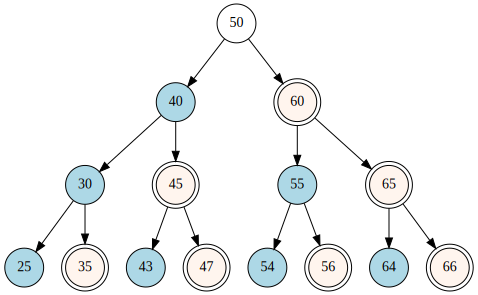

In [94]:
b1 = BST(50)

b1.insert(40)
b1.insert(30)
b1.insert(45)
b1.insert(25)
b1.insert(35)
b1.insert(43)
b1.insert(47)
b1.insert(60)
b1.insert(55)
b1.insert(54)
b1.insert(56)
b1.insert(65)
b1.insert(64)
b1.insert(66)

visualize_tree(b1)

In [95]:
print(b1.depth_first_search_iterative(25))
print(b1.depth_first_search_iterative(100))

(True, 4)
(False, 15)


In [96]:
print(b1.depth_first_search_recursive(25))
print(b1.depth_first_search_recursive(100))

(True, 4)
(False, 15)


In [97]:
print(b1.breadth_first_search(25))
print(b1.breadth_first_search(100))

(True, 8)
(False, 15)


In [98]:
print(b1.uniform_cost_search(25))
print(b1.uniform_cost_search(100))

(True, 6)
(False, 15)


In [99]:
print(b1.depth_limited_search_recursive(25, 3))
print(b1.depth_limited_search_recursive(100, 3))

print(b1.depth_limited_search_iterative(25, 3))
print(b1.depth_limited_search_iterative(100, 3))

(True, 4)
(False, 15)
(True, 4)
(False, 15)


In [100]:
print(b1.iterative_deeping_dfs(25))





(True, 15)


In [72]:
b1.get_level(66)

50
40
30
25
35
45
43
47
60
55
54
56
65
64
66


3